In [4]:
import pandas as pd
import numpy as np

In [5]:
transactional_dataset = pd.read_csv('../data/bank/bs140513_032310.csv') 


In [6]:
transactional_dataset.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [7]:
for column in transactional_dataset.select_dtypes(include=['object']).columns:
    transactional_dataset[column] = transactional_dataset[column].apply(lambda x:x.strip("'"))

transactional_dataset.head()
#cleansed_transactional_dataset = 

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


In [8]:
grouped_by_fraud = transactional_dataset.groupby(['merchant', 'customer'])

In [15]:
grouped_by_fraud_countsum = grouped_by_fraud.agg({'fraud':['count','sum']})
grouped_by_fraud_countsum

fraud    
                        count sum
merchant    customer             
M1053599405 C1000148617     1   0
            C100045114      4   0
            C1000699316     1   0
            C1002658784     2   0
            C1004109477     2   0
            C1004300450     2   0
            C1005126300     2   0
            C1005495267     3   0
            C1006176917     2   0
            C1007572087     1   0
            C1007790716     1   0
            C1008918174     2   0
            C1009080922     1   0
            C100992504      5   0
            C10105795       3   0
            C1010589026     6   0
            C1010865894     2   0
            C1011693897     1   0
            C1013199152     3   0
            C1013313546     4   0
            C1014010834     3   0
            C1014124305     1   0
            C1017469037     1   0
            C1017941602     4   0
            C1018388493     3   0
            C1018653381     6   0
            C1018783569     3   0
            C1018979501     1   0
            C1019071188     1   0
            C102010508      2   0
...                       ...  ..
M980657600  C922544599      2   0
            C926672832      2   2
            C927766810      1   1
            C928090253      4   3
            C928481238      1   1
            C931370744      2   2
            C932908444     11  11
            C940143351      2   2
            C940412764      1   0
            C944695695      1   1
            C944711585      1   0
            C946935568      1   0
            C949319027      1   1
            C95082443       1   1
            C954359387      1   1
            C961154945      4   4
            C963460752      1   1
            C964123988      1   1
            C965952231      1   1
            C967956630      1   1
            C971766834      1   1
            C974315171      3   3
            C980181294      1   1
            C983636862      1   0
            C985141335      1   1
            C985780492      1   1
            C989137613      1   0
            C993027768      1   1
            C994449484      1   1
            C995844287      2   2

[47132 rows x 2 columns]

In [12]:
grouped_by_fraud_countsum.index

MultiIndex(levels=[['M1053599405', 'M117188757', 'M1198415165', 'M1294758098', 'M1313686961', 'M1352454843', 'M1353266412', 'M1400236507', 'M1416436880', 'M151143676', 'M1535107174', 'M1600850729', 'M1649169323', 'M1726401631', 'M17379832', 'M1741626453', 'M1748431652', 'M1788569036', 'M1823072687', 'M1842530320', 'M1872033263', 'M1873032707', 'M1888755466', 'M1913465890', 'M1946091778', 'M2011752106', 'M2080407379', 'M209847108', 'M2122776122', 'M348875670', 'M348934600', 'M349281107', 'M3697346', 'M45060432', 'M480139044', 'M495352832', 'M50039827', 'M547558035', 'M677738360', 'M692898500', 'M732195782', 'M78078399', 'M840466850', 'M855959430', 'M857378720', 'M85975013', 'M923029380', 'M933210764', 'M97925176', 'M980657600'], ['C1000148617', 'C100045114', 'C1000699316', 'C1001065306', 'C1002658784', 'C1002759277', 'C1004109477', 'C1004300450', 'C1004532392', 'C1005126300', 'C1005495267', 'C1005806982', 'C1006176917', 'C1007572087', 'C1007790716', 'C1008918174', 'C1009080922', 'C10099

In [13]:
grouped_by_fraud_countsum.columns

MultiIndex(levels=[['fraud'], ['count', 'sum']],
           codes=[[0, 0], [0, 1]])

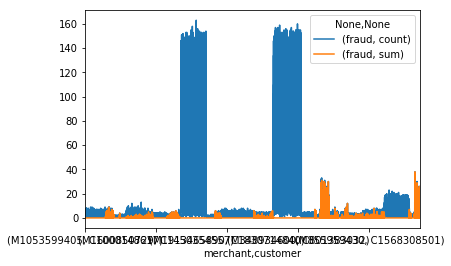

In [17]:
plot = grouped_by_fraud_countsum.plot()